In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import preprocessing, linear_model
from sklearn.cross_validation import LeaveOneOut,cross_val_score
from sklearn import decomposition
%matplotlib inline


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X = pd.read_csv("../../R/DataMinning/dengue_features_train.csv")
Y = pd.read_csv("../../R/DataMinning/dengue_labels_train.csv")
X_New = pd.read_csv("../../R/DataMinning/dengue_features_test.csv")
Y_New = pd.read_csv('../../R/DataMinning/submission_format.csv')

In [3]:
X['week_start_date'] = pd.to_datetime(X['week_start_date'])
X_New['week_start_date'] = pd.to_datetime(X_New['week_start_date'])
X = X.fillna(0)
X_New = X_New.fillna(0)
X_sj = X[(X['city'] == 'sj')]
X_iq = X[(X['city'] == 'iq')]
Y_sj = Y[(Y['city'] == 'sj')]
Y_iq = Y[(Y['city'] == 'iq')]
X_New_sj = X_New[(X_New['city'] == 'sj')]
X_New_iq = X_New[(X_New['city'] == 'iq')]
y_sj = Y_sj.drop(columns=['city','year','weekofyear'])
y_iq = Y_iq.drop(columns=['city','year','weekofyear'])


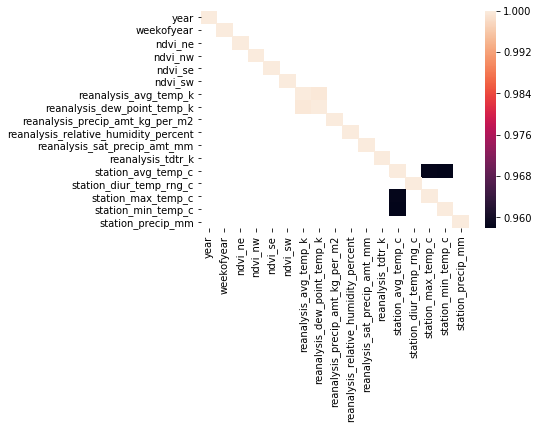

In [4]:
X_sj_ncr=X_sj.drop(columns=['reanalysis_air_temp_k',
                            'precipitation_amt_mm',
                            'reanalysis_specific_humidity_g_per_kg',
                            'reanalysis_max_air_temp_k',
                            'reanalysis_min_air_temp_k'])
X_New_sj_ncr= X_New_sj.drop(columns=['reanalysis_air_temp_k',
                                     'precipitation_amt_mm',
                                     'reanalysis_specific_humidity_g_per_kg',
                                     'reanalysis_max_air_temp_k',
                                     'reanalysis_min_air_temp_k'])
Crr_sj = X_sj_ncr.corr()
Crr_sj_high = (Crr_sj[(Crr_sj>0.9)])
sns.heatmap(Crr_sj_high, 
        xticklabels=Crr_sj_high.columns,
        yticklabels=Crr_sj_high.columns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 936 to 1455
Data columns (total 24 columns):
city                                     520 non-null object
year                                     520 non-null int64
weekofyear                               520 non-null int64
week_start_date                          520 non-null datetime64[ns]
ndvi_ne                                  520 non-null float64
ndvi_nw                                  520 non-null float64
ndvi_se                                  520 non-null float64
ndvi_sw                                  520 non-null float64
precipitation_amt_mm                     520 non-null float64
reanalysis_air_temp_k                    520 non-null float64
reanalysis_avg_temp_k                    520 non-null float64
reanalysis_dew_point_temp_k              520 non-null float64
reanalysis_max_air_temp_k                520 non-null float64
reanalysis_min_air_temp_k                520 non-null float64
reanalysis_precip_amt_

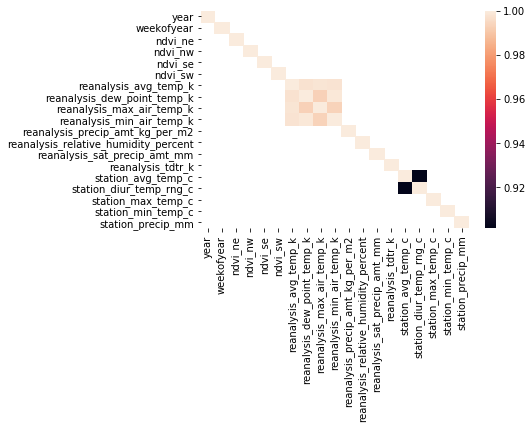

In [5]:
X_iq.info()
X_iq_ncr=X_iq.drop(columns=['reanalysis_air_temp_k',
                            'precipitation_amt_mm',
                            'reanalysis_specific_humidity_g_per_kg'])
X_New_iq_ncr= X_New_iq.drop(columns=['reanalysis_air_temp_k',
                                     'precipitation_amt_mm',
                                     'reanalysis_specific_humidity_g_per_kg'])
Crr_iq = X_iq_ncr.corr()
Crr_iq_high = (Crr_iq[(Crr_iq>0.9)])
sns.heatmap(Crr_iq_high, 
        xticklabels=Crr_iq_high.columns,
        yticklabels=Crr_iq_high.columns)


In [6]:
rng = np.random.RandomState(1)
# rf2 = AdaBoostRegressor(RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0),n_estimators=300, random_state=rng) 
# rf = AdaBoostRegressor(RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0),n_estimators=300, random_state=rng) 
rf = linear_model.LinearRegression()
rf2 = linear_model.LinearRegression()

In [7]:
X_iq_ncr1=X_iq_ncr.drop(columns=['city','week_start_date'])
X_sj_ncr1 = X_sj_ncr.drop(columns=['city','week_start_date'])
y_sj.info()

model_iq = rf2.fit(X_iq_ncr1,y_iq.values.ravel())
model_sj = rf.fit(X_sj_ncr1,y_sj.values.ravel())
X_sj_ncr1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 1 columns):
total_cases    936 non-null int64
dtypes: int64(1)
memory usage: 14.6 KB


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,0.122600,0.103725,0.198483,0.177617,297.742857,292.414286,32.00,73.365714,12.42,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,0.169900,0.142175,0.162357,0.155486,298.442857,293.951429,17.94,77.368571,22.82,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,0.032250,0.172967,0.157200,0.170843,298.878571,295.434286,26.10,82.052857,34.54,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,0.128633,0.245067,0.227557,0.235886,299.228571,295.310000,13.90,80.337143,15.36,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,0.196200,0.262200,0.251200,0.247340,299.664286,295.821429,12.20,80.460000,7.52,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,1990,23,0.000000,0.174850,0.254314,0.181743,299.764286,295.851429,26.49,79.891429,9.58,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,1990,24,0.112900,0.092800,0.205071,0.210271,299.221429,295.865714,38.60,82.000000,3.48,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,1990,25,0.072500,0.072500,0.151471,0.133029,299.528571,296.531429,30.00,83.375714,151.12,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,1990,26,0.102450,0.146175,0.125571,0.123600,299.557143,296.378571,37.51,82.768571,19.32,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,1990,27,0.000000,0.121550,0.160683,0.202567,300.278571,296.651429,28.40,81.281429,14.41,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [8]:
X_iq_ncr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 936 to 1455
Data columns (total 19 columns):
year                                    520 non-null int64
weekofyear                              520 non-null int64
ndvi_ne                                 520 non-null float64
ndvi_nw                                 520 non-null float64
ndvi_se                                 520 non-null float64
ndvi_sw                                 520 non-null float64
reanalysis_avg_temp_k                   520 non-null float64
reanalysis_dew_point_temp_k             520 non-null float64
reanalysis_max_air_temp_k               520 non-null float64
reanalysis_min_air_temp_k               520 non-null float64
reanalysis_precip_amt_kg_per_m2         520 non-null float64
reanalysis_relative_humidity_percent    520 non-null float64
reanalysis_sat_precip_amt_mm            520 non-null float64
reanalysis_tdtr_k                       520 non-null float64
station_avg_temp_c                      52

In [9]:
# pca = decomposition.PCA()
# X_pca = X_sj.drop(columns=['week_start_date','city'])
# # X_pca = pca.fit_transform(X_pca)
# X_pca
X_New_sj1 = X_New_sj_ncr.drop(columns = ['city','week_start_date'])
X_New_iq1 = X_New_iq_ncr.drop(columns = ['city','week_start_date'])
y_New_sj = model_sj.predict(X_New_sj1)


In [10]:
y_New_iq = model_iq.predict(X_New_iq1)
len(y_New_iq)
y_New_sj

array([ 31.94450653,  27.01443805,  28.80805086,  37.21634877,
        47.42103444,  41.059419  ,  27.7601712 ,  29.28231135,
        33.70134624,  17.85115484,   1.23339756,  14.68713055,
       -12.73945998,  33.59895453,  14.73249226,  46.60430174,
         4.24437651,  17.24138185,  36.094887  ,  11.69188099,
        11.204865  ,   6.93959018,   9.91763384,  25.7432743 ,
        37.74728816,   3.10192938,  38.10439195,  34.84200801,
        15.97209551,  23.65942673,  23.37224041,  27.1317242 ,
         7.85015434,  14.95884795,  26.59701347, -27.83382636,
       -37.80552202, -15.21943761,  -1.72780422, -14.57986032,
         2.59008328, -22.36401355,  -2.04767625, -27.68871291,
        -9.62354299,  26.88727181, -12.48427193,   0.79152145,
         7.31023816,   1.05361405,  16.4964017 ,  14.24461394,
         6.30622821,  29.80108823,  15.05484517,  11.60787103,
        -7.88466564,  21.75288589,  28.0317131 ,  23.32657212,
        15.47029705,  12.51884882,  18.47087957,  10.49

In [11]:
y_New_sj = pd.DataFrame(y_New_sj)
y_New_iq = pd.DataFrame(y_New_iq)
y_new = y_New_sj.append(y_New_iq , ignore_index= True)

Y_New['total_cases'] = y_new.round(0)
Y_New['total_cases'] = Y_New['total_cases'].astype(int)
Y_New.to_csv('../../R/DataMinning/submission_2city2.csv')
y_new

,0
0,31.944507
1,27.014438
2,28.808051
3,37.216349
4,47.421034
5,41.059419
6,27.760171
7,29.282311
8,33.701346
9,17.851155
